In [1]:
%pip install --upgrade numpy matplotlib pandas seaborn tqdm pyarrow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Exploring the Experiment's Design

In this notebook, we'll get our first look at the experiment we'll be analyzing in this course; curated data from the [Steinmetz et al, 2019](https://www.nature.com/articles/s41586-019-1787-x) paper.  

The data we'll be using in this notebook is focused on three CSV files, each containing sessions from a different stretch of data collection. They contain trial-level data from the experiment: 
  - `steinmetz_winter2016.csv`
  - `steinmetz_summer2017.csv`
  - `steinmetz_winter2017.csv`

##### Analysis Goal
Our goal is to get a better understanding of the experimental setup, answering questions such as:
- how many sessions where recorded in total?
- how many mice were involved in the experiment?
- how many trials in each session?
- and more

##### Learning Goal
By going through the following exercises and exploring the dataset, we'll get practice in working with [**Pandas Dataframes**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), a tool that appears in a lot of Python data science analyses!


---

## Download Data

Run the following code to get the datasets downloaded to the 'data' folder:

In [3]:
# %pip install tqdm  # optional: install tqdm if you'd like to see progress bars during the download.

In [52]:
import sys
sys.path.append('src')
import sciebo

sciebo.download_file('https://uni-bonn.sciebo.de/s/npn4isYyXOUM1hB', 'data/steinmetz_winter2017.csv')
sciebo.download_file('https://uni-bonn.sciebo.de/s/ICDCXBrmZruoZcB', 'data/steinmetz_winter2016.csv')
sciebo.download_file('https://uni-bonn.sciebo.de/s/AS2X70aUC9OJPbS', 'data/steinmetz_summer2017.csv')


### Load Data and Get a Quick Description

In this first part, we will get started with Pandas by first loading the dataset as a DataFrame (i.e. a table) and using some of the functions attached to the dataframe to get a quick look at the data. 

Below is a table containing some code, and their description, that we'll be using in this section:

| **Code**                 | **Description**                                    |
|--------------------------|----------------------------------------------------|
| `df = pd.read_csv("path/to/datafile.csv")` | Load the data stored in a CSV file as a pandas DataFrame and call it `df`. |
| `df.head(5)` or `df[:5]`                  | Take a look at the first 5 rows in the data.      |
| `df.tail(5)` or `df[-5:]`                 | Take a look at the last 5 rows in the data.       |
| `len(df)`                               | See the total number of rows (in this case, trials). |

##### Exercises

Let's get a sense of what kind of data is in these files.  Load each of the datasets into a different variable name using the `pd.read_csv()` function, and answer the questions below!


**Example**: Load the Winter 2016 dataset and preview the first 3 rows of the data

In [5]:
df1 = pd.read_csv('./data/steinmetz_winter2016.csv')
df1[:3]

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,1,True,100,0,0.5,1.027216,1.0,1.150204,1.186819,1.0,170.0,1.0,Cori,2016-12-14,5dd41e
1,2,True,0,50,0.5,0.874414,-1.0,1.399503,1.437623,1.0,230.0,-1.0,Cori,2016-12-14,5dd41e
2,3,True,100,50,0.5,0.825213,1.0,0.949291,0.986016,1.0,200.0,1.0,Cori,2016-12-14,5dd41e


Load the Winter 2017 Dataset and preview the first 5 rows of the data

Load the Summer 2017 Dataset and preview the last 4 rows of the data

Calculate the number of rows (i.e. the "length") of each of the three datasets. In this data, each row represents one trial.  Which file contained the most trials?

**Example**: N Trials, Winter 2016:

In [8]:
len(df1)

3767

N Trials, Winter 2017:

N Trials, Summer 2017:

**Example**: The first 3 rows of the winter 2016 dataframe:

In [11]:
df1.head(3)  # or df2[:3]

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,1,True,100,0,0.5,1.027216,1.0,1.150204,1.186819,1.0,170.0,1.0,Cori,2016-12-14,5dd41e
1,2,True,0,50,0.5,0.874414,-1.0,1.399503,1.437623,1.0,230.0,-1.0,Cori,2016-12-14,5dd41e
2,3,True,100,50,0.5,0.825213,1.0,0.949291,0.986016,1.0,200.0,1.0,Cori,2016-12-14,5dd41e


The last 4 rows of the winter 2017 dataframe:

The first 9 rows of the summer 2017 dataframe:

---

### Exploring the Structure of a Dataset for the Purpose of Merging Them

Multi-session data is easiest to analyze with when each session is organized the same way, and contains the same variables. In a table (what the `pandas` library calls a `DataFrame`), that means all the datasets have the same columns and that they store the same kind of data. 

| **Code**                     | **Description**                                                                                                          |
|------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| `df.columns`                 | Returns the column labels of the DataFrame.                                                                             |
| `df.dtypes`                  | Provides the data types of each column in the DataFrame.                                                                |
| `df.info()`                  | Prints a concise summary of a DataFrame, including the index dtype and column dtypes, non-null values, and memory usage.|
| `pd.concat([df1, df2], axis=0)` | Concatenates pandas objects (`df1` and `df2`) along a particular axis (default is 0, meaning rows).                     |


These operations and methods are fundamental for data manipulation and exploration in pandas, providing insights into the structure and composition of our data.

**Exercises** 

Let's look in more detail at each of these tables' structures!

**Example**: What columns are in the Winter 2016 data?

In [14]:
df1.columns

Index(['trial', 'active_trials', 'contrast_left', 'contrast_right',
       'stim_onset', 'gocue_time', 'response_type', 'response_time',
       'feedback_time', 'feedback_type', 'reaction_time', 'reaction_type',
       'mouse', 'session_date', 'session_id'],
      dtype='object')

What columns are in the Winter 2017 data, and under data type (i.e. "dtype") is each column's data formatted as? 

For the Summer 2017 data, let's get more `info`; in this case, the number of rows with non-missing data for each column, as well as much memory the dataset takes up on the computer.

Is there any missing data in the Summer 2017 dataset?  And how many kilobytes does the whole dataset take up in the dataframe?

**Example**: Concatenate the two winter tables into a single one.

In [17]:
df = pd.concat([df1, df2]);

Concatenate all three tables into a single one.

How many trials are in the entire dataset?

Are the same columns still in this dataset?

---

### Counting Categorical Data: Counting Sessions, Mice, and Trial Conditions

In Python, the square brackets can be used to get data from a data collection.  In the case of Pandas Dataframes (which our table is an instance of), this lets us get the columns by name.

| **Code**                                           | **Description**                                                                                                  |
|----------------------------------------------------|------------------------------------------------------------------------------------------------------------------|
| `df['col'].nunique()`                           | Returns the number of unique values in the specified column.                                                     |
| `df['col'].unique()`                            | Provides an array of all unique values in the specified column.                                                  |
| `df['col'].value_counts().sort_index()`         | Counts the occurrence of each unique value in the specified column, then sorts these counts by the index (value).|
| `df[['col1', 'col2']].value_counts().sort_index()` | Counts the occurrence of unique combinations in the specified columns, then sorts these counts by the index.     |


Let's use these techniques to answer some questions about how the experiment was structured.

**Example**: How many sessions are in the entire dataset (i.e. how many unique values are there in the column "session_id")?

In [21]:
df['session_id'].nunique()

39

How many mice?

What were the names of the mice?

array(['Cori', 'Muller', 'Radnitz', 'Theiler', 'Richards', 'Forssmann',
       'Lederberg', 'Tatum', 'Moniz', 'Hench'], dtype=object)

What are the different contrast levels for the left stimulus?

How many different contrast levels are there for the left stimulus?

What were the different values in feedback_types?

What were the different values in response types?

**Example**: How many trials were considered "active" (i.e. the mouse was expected to be actively responding to the stimuli, vs just being passively shown stimuli at the end of a session)?

In [28]:
df['active_trials'].value_counts()

active_trials
True     10050
False     4370
Name: count, dtype: int64

How many trials did each of the mice do?

How many trials were there for each value of `contrast_left`?

Each trial contained two stimuli: one on the left of the mouse, and one on the right, each with their own contrast levels.  How many trials were there for each combination of `contrast_left` and `contrast_right`?

---

### Calculating Statics on Continuous Data: Measuring Response Time

| **Code**                                | **Description**                                                                                              |
|-----------------------------------------|--------------------------------------------------------------------------------------------------------------|
| `df['col'].min()`                       | Returns the minimum value in the specified column.                                                           |
| `df['col'].max()`                       | Returns the maximum value in the specified column.                                                           |
| `df['col'].mean()`                      | Calculates the mean (average) of the specified column.                                                       |
| `df['col'].median()`                    | Finds the median (middle value) of the specified column.                                                     |
| `df['col'].std()`                       | Computes the standard deviation, a measure of the amount of variation or dispersion, of the specified column.|
| `df[['col1', 'col2']].mean()`           | Calculates the mean (average) of each specified column and returns a Series with these averages.             |

**Example**: What was the minimum response time?

In [32]:
df['response_time'].min()

np.float64(0.4794144976744405)

What was the maximum response time across all the trials?

What was the mean response time?  

What was the median response time?

#### Extra:
It's possible to calculate multiple aggregation statistics at the same time, as well, using the `df.agg()` method and giving it a list of statistic functions to call on the data, for example from the numpy (`np`) package:

```python
df[['column1', 'column2']].agg([np.mean, np.min, np.max])
```

If you like, try out this pattern by calculating the min, max, mean, and median at the same time on the response times and the reaction times!

---

### Group-specific Experiment Description: Calculating Statistics Across Categorical Data

Perhaps the most useful pattern in all of data science is the "group-by" pattern; it lets you compute a statistic on different groups of data, essentially building a mini analysis pipeline in a single line of code!  

Here is the pattern, broken down into its individual steps:


```python
(
df                     # 1. Choose a dataset
.groupby('column1')    # 2. Split the Data into sub-datasets, based on values in column1
['column2']            # 3. Get column2 in each of those sub-datasets
.mean()                # 4. Calculate the mean of column2 for each sub-dataset
)
```

Below are some examples of the pattern:

| **Code**                                                 | **Description**                                                                                               |
|---------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------|
| `df.groupby('col1')['col2'].mean()`                           | Calculates the mean of `col2` for each group in `col1`.                                                      |
| `df.groupby('col1')['col2'].min()`                            | Finds the minimum value of `col2` for each group in `col1`.                                                  |
| `df.groupby('col1')['col2'].size()`                           | Counts the size of `col2` for each group in `col1`.                                                          |
| `df.groupby('col1')['col2'].size().sort_index()`              | Counts the size of `col2` for each group in `col1`, then sorts these counts by the index.                    |
| `df.groupby('col1')['col2'].size().mean()`                    | Calculates the mean of the sizes of `col2` for each group in `col1`.                                         |
| `df.groupby(['col1', 'col2'])['col3'].mean()`                 | Calculates the mean of `col3` for each combination of groups in `col1` and `col2`.                           |
| `df.groupby(['col1', 'col2'])['col3'].median()`               | Finds the median of `col3` for each combination of groups in `col1` and `col2`.                              |
| `df.groupby(['col1', 'col2'])['col3'].median().reset_index()` | Finds the median of `col3` for each combination of groups in `col1` and `col2`, resetting the index.         |
| `df.groupby('col1')['col2'].plot.bar()`                       | Creates a bar plot of the counts of `col2` for each group in `col1`.                                         |
| `df.groupby('col1')['col2'].plot.barh()`                      | Creates a horizontal bar plot of the counts of `col2` for each group in `col1`.                              |
| `df.groupby('col1')['col2'].size().plot.line()`               | Creates a line plot showing the size of each group in `col1` over `col2`.                                    |



Let's try it out!

**Example**: How many trials did each mouse perform?

In [37]:
df.groupby('mouse').size()

mouse
Cori         1143
Forssmann    1485
Hench        1851
Lederberg    2902
Moniz         896
Muller       1112
Radnitz      1512
Richards     1677
Tatum        1389
Theiler       453
dtype: int64

How many trials were there of each contrast_left level?

What was the mean response time for each mouse?

What was the mean number of trials across sessions?

What was the minimum number of trials in a session?

How many sessions did each mouse do?

How many trials were there of each combination of contrast_left and contrast_right levels?

Make a bar plot showing how many trials there were for each contrast_right level.

Make a horizontal bar plot showing how many sessions each mouse did.

Make a line plot showing how many trials there were for each contrast_left level.

---

### Visualizing the Experimental Design using Some Useful Plotting Recipes

We'll be using the [**Seaborn package**](https://seaborn.pydata.org/) a lot in this course, which is a Python data visualization library that provides a high-level interface for creating attractive and informative statistical graphics. It integrates well with pandas DataFrames, making it especially useful for exploring and understanding data through its support for complex visualizations with minimal code and for producing plots that can easily convey insights from the data.

Let's try out a few of the Seaborn plotting functions using the following patterns:

| **Operation**                                                        | **Description**                                                                                                     |
|----------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------|
| `sns.countplot(df['col1'])`                                          | Generates a count plot for the values in `col1`, showing the counts of the unique values of the column.            |
| `sns.histplot(df['col1'])`                                           | Creates a histogram for `col1`, visualizing the distribution of the column's values.                               |
| `sns.kdeplot(df['col1'])`                                            | Plots the Kernel Density Estimate (KDE) for `col1`, which estimates the probability density function of the column. |
| `sns.heatmap(df.groupby(['col1', 'col2'])['col3'].size().unstack())` | Generates a heatmap representing the size of groups formed by combining `col1` and `col2`, with `col3` values.     |

Let's make some plots of the data using Seaborn (`sns`)!

**Example**: How many trials were in each session?

<Axes: xlabel='count', ylabel='session_id'>

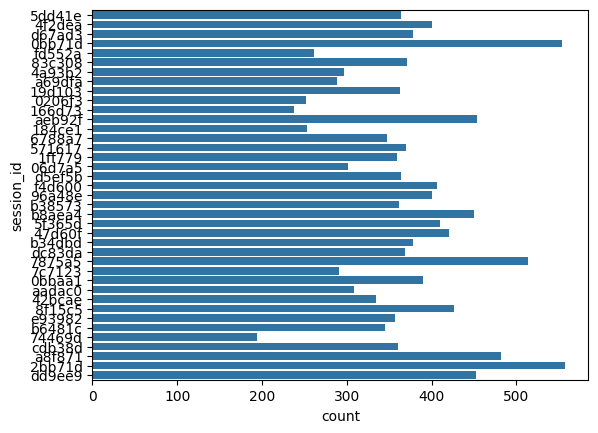

In [47]:
sns.countplot(data=df, y="session_id")

How many trials did each mouse do?

Make a histogram of the response times in the dataset

Make a kernel density estimate (kind of a smoothed histogram) of the response times in the dataset.

This one is a little more complex: Using `groupby`, `size()`, and `unstack`, make a heatmap of showing number of contrast_left and contrast_right trials

### Seaborn gallery

If you'd like to explore other kinds of plots that can be made using seaborn, check out their gallery [here](https://seaborn.pydata.org/examples/index.html) where you will find the complete code to create those plots.